In [3]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'cividis'

In [28]:
path = "/Volumes/warm_archiv/3dseg/data/pore-detection/Parallelprobe_Porenerkennung_test/raw"
file_raw = "Parallelprobe_Porenerkennung_Validierung_890_210_763.h5" 
# file_bin = "Probe_Maskierung.h5" 

assert os.path.exists(os.path.join(path,file_raw)) #and os.path.exists(os.path.join(path,file_bin))

In [35]:
data = {}

with h5py.File(os.path.join(path,file_raw), "r") as file:
    
    # List all the groups in the HDF5 file
    print("Groups:")
    for group in file:
        print(group)

    data["raw"] = np.array(file['data']).astype(np.uint16).reshape((763,210,890))
    
    
# with h5py.File(os.path.join(path,file_bin), "r") as file:
    
#     # List all the groups in the HDF5 file
#     print("Groups:")
#     for group in file:
#         print(group)

#     data["labels"] = np.array(file['data'][:]).astype(np.uint8)


Groups:
data


In [36]:
for key,item in data.items():
    print(key)
    print(item.dtype)
    print(item.shape)
    print(item.max(),item.min())

raw
uint16
(763, 210, 890)
16390 0


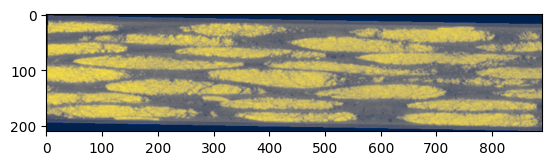

In [37]:
plt.imshow(data["raw"][40,:,:])

In [22]:
obj_ids = np.unique(data["labels"])

print(obj_ids)

obj_ids = obj_ids[::-1]
print(obj_ids)
data["masks"] = data["labels"] == obj_ids[:, None, None ,None]

[0 1]
[1 0]


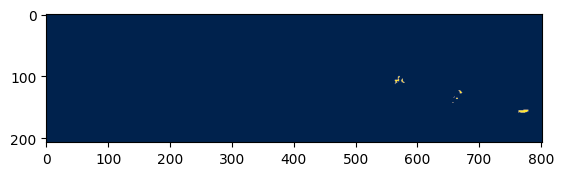

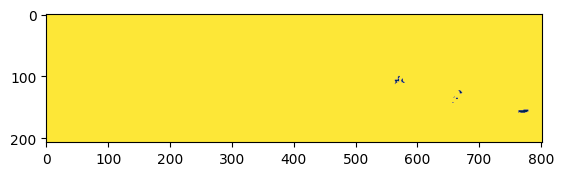

In [25]:
plt.imshow(data["masks"][0,10,::])
plt.show()
plt.imshow(data["masks"][1,10,::])
plt.show()

In [38]:
with h5py.File(os.path.join("Parallelprobe_Porenerkennung.vol.test.h5"), 'w') as f:
    for key,item in data.items():
        f.create_dataset(key, data = item)